In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [3]:
base = pd.read_csv(r"C:\Users\mmelgar\Desktop\Cursoml\Semana 2\archive\housing.csv",sep=',',encoding='latin-1') # Importo el dataset seleccionado en cuestión.

In [3]:
base.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

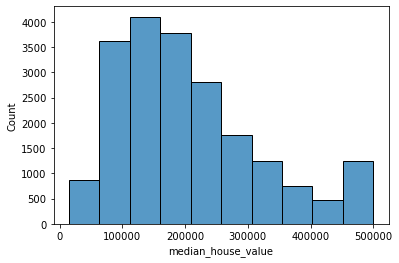

In [6]:
sns.histplot(base.median_house_value, bins= 10)

In [4]:
base2 = base[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [22]:
base2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [24]:
base2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [25]:
base2['population'].median()

1166.0

In [292]:
np.random.seed(9)

In [294]:
np.random.shuffle(idx)

In [293]:
n = len(base2)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [290]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [33]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [295]:
idx[n_train:]

array([13339,  2590, 18494, ...,  5014,  9979,   501])

In [296]:
df_train = base2.iloc[idx[:n_train]]
df_val = base2.iloc[idx[n_train:n_train+n_val]]
df_test = base2.iloc[idx[n_train+n_val:]]

In [231]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [297]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [298]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [201]:
from sklearn.linear_model import LinearRegression # Importamos el modelo.
linear_regression = LinearRegression()

In [40]:
df_train['total_bedrooms'].mean()

531.3334420348932

In [299]:
df_train2 = df_train.fillna(0)
df_train3 = df_train.fillna(df_train['total_bedrooms'].mean())

In [300]:
linear_regression.fit(df_train2,y_train)

LinearRegression()

In [43]:
linear_regression.fit(df_train3,y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error

In [301]:
df_val2 = df_val.fillna(0)
df_val3 = df_val.fillna(df_val['total_bedrooms'].mean())

In [302]:
y_train_pred2 = linear_regression.predict(df_train2) # Predicción en Train2.
y_train_pred3 = linear_regression.predict(df_train3) # Predicción en Train3.
y_val_pred2 = linear_regression.predict(df_val2) # Predicción en Val2.
y_val_pred3 = linear_regression.predict(df_val3) # Predicción en Val3.

In [303]:
score2 = mean_squared_error(y_val_pred2, y_val, squared=False)

In [207]:
score3 = mean_squared_error(y_val_pred3, y_val, squared=False)

In [304]:
score_round2 = round(score2, 2)
score_round3 = round(score3, 2)

In [305]:
score_round2, score_round3

(0.34, 0.34)

In [51]:
from sklearn.linear_model import Ridge

In [124]:
rdg = Ridge(alpha = 0.001)

In [125]:
rdg.fit(df_train2, y_train)

Ridge(alpha=0.001)

In [126]:
y_val_pred2 = rdg.predict(df_val2) # Predicción en Val2.

In [127]:
score_rdg = mean_squared_error(y_val_pred2, y_val, squared=False)

In [128]:
score_rdg

0.3625894449822913

In [132]:
def seeds(X):
    n = len(base2)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.seed(X)
    df_train = base2.iloc[idx[:n_train]]
    df_val = base2.iloc[idx[n_train:n_train+n_val]]
    df_test = base2.iloc[idx[n_train+n_val:]]
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    df_train2 = df_train.fillna(0)
    linear_regression.fit(df_train2,y_train)
    df_val2 = df_val.fillna(0)
    y_val_pred2 = linear_regression.predict(df_val2) # Predicción en Val2.
    score2 = mean_squared_error(y_val_pred2, y_val, squared=False)
    return score2
    
    

In [133]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [134]:
seds = []

In [154]:
for y in X:
    seds.append(seeds(y))

In [307]:
stds = [0.35, 0.36, 0.36, 0.34, 0.34, 0.34, 0.35, 0.34, 0.36, 0.34]

In [308]:
np.std(stds)

0.008717797887081328

In [309]:
round(np.std(stds), 3)

0.009

In [310]:
np.random.seed(9)

In [311]:
n = len(base2)
n_test = int(n * 0.2)
n_train = n - n_test

In [312]:
idx = np.arange(n)

In [313]:
np.random.shuffle(idx)

In [314]:
df_train2 = base2.iloc[idx[:n_train]]
df_test2 = base2.iloc[idx[n_train:]]

In [316]:
len(df_train2), len(df_test2)

(16512, 4128)

In [317]:
y_train2 = np.log1p(df_train2.median_house_value.values)
y_test2 = np.log1p(df_test2.median_house_value.values)

In [319]:
del df_train2['median_house_value']
del df_test2['median_house_value']

In [326]:
df_train_0 = df_train2.fillna(0)
df_test_0 = df_test2.fillna(0)

In [324]:
rdg.fit(df_train_0, y_train2)

Ridge(alpha=0.001)

In [328]:
y_test_pred2 = rdg.predict(df_test_0) # Predicción en test2.

In [330]:
score_rdg = mean_squared_error(y_test_pred2, y_test2, squared=False)
score_rdg

0.3453149516425927